In [12]:
### LIBRERIAS:

from matplotlib import pyplot as plt
from scipy.signal import square, sawtooth
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import warnings

import scipy
from scipy.fftpack import fft, fftfreq, fftshift

In [8]:
def show(signal1:np.array, signal2:np.array, N=None):
    """
    FUNCIÓN ENCARGADA DE PLOTEAR LA RECONSTRUCCIÓN
    ------------------------------------------------
    Signal1
    """

    plt.figure(figsize=(10, 5), dpi=90)

    plt.plot(t, signal1, '--', label='Square signal')
    plt.plot(t, signal2, label=f'Fourier series (N={N})')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)

In [10]:
def Fourier_Series(signal:np.array,t:np.array,N:int,Plot:bool=True):
    """
    FUNCION QUE SE ENCARGA DE CALCULAR LA RECONSTRUCCIÓN POR SERIES DE FOURIER
    --------------------------------------------------------------------------
    Parameters
    --------------------------------------------------------------------------

    Signal{np.array}: SEÑAL A RECONSTRUIR
    t{np.array}: ARREGLO DE TIEMPO
    N{int}: NUMERO DE ARMONICOS
    Plot{bool}: Define si se desea plotear la reconstrucción directamente en 
    la función.

    Returns
    --------------------------------------------------------------------------
    F_Series{np.array}: Devuelve la reconstrucción

    """
    T = t[-1] - t[0]
    a0 = (2/T) * np.trapz(signal, t)
    an = lambda n:(2/T) * np.trapz(signal*np.cos(2*n*np.pi*t/T), t)
    bn = lambda n:(2/T) * np.trapz(signal*np.sin(2*n*np.pi*t/T), t)
    p = []
    for n in range(1, N+1):
        p.append(an(n)*np.cos(2*n*np.pi*t/T) + bn(n)*np.sin(2*n*np.pi*t/T))
    p = np.array(p)
    signal_ = p.sum(axis=0)

    if(Plot):
        show(signal, signal_, N=N)
    return signal_ 


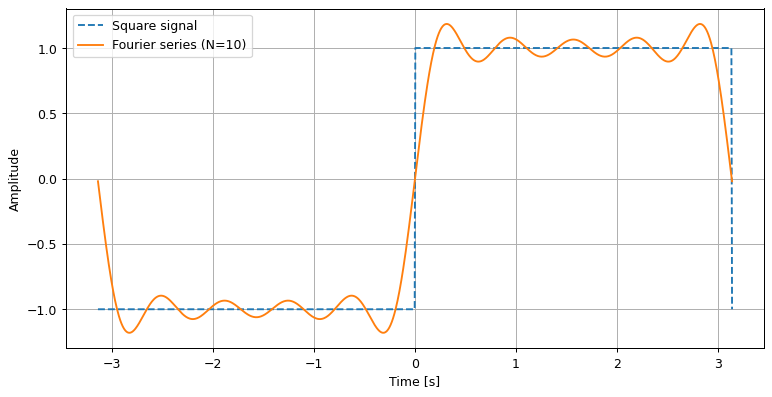

In [11]:
if __name__=="__main__":
   t = np.linspace(-np.pi, np.pi, 1000)  # time
   signal = square(t) 
   N=10
   Fourier_Series(signal,t,N)

In [13]:
## TRANSFORMADA DE FOURIER

def Fourier_Transform(Signal:np.array,t:np.array,Plot="simple",xlim:list=[-10,10]):
    """
    FUNCIÓN ENCARGADA DE CALCULAR Y GRAFICAR LA TRANSFORMADA DE FOURIER PARA UNA SEÑAL X(t)
    --------------------------------------------------------------------------------------
    Parameters
    --------------------------------------------------------------------------------------
    Signal{np.array}: Arreglo con la señal x(t)
    t{np.array}: Vector de tiempo
    Plot{Str}: Variable para determinar el tipo de ploteo a realizar, para el cual se manejan
    3 valores
        -Plot==simple[Default]: me grafica la transformada con sus valores Reales.
        -Plot==Imag_Real: Me grafica la transformada tanto la parte real como la imaginaria.
        -Plot==Complete: Me grafica la magnitud, parte real, parte imaginaria y fase.
   xlim{list:2 Elementos}=DEFINE LOS LIMITES DEL PLOTEO EN X. 


    Returns
    --------------------------------------------------------------------------------------
     ft{np.array}: Transformada de fourier  de Signal
     w{np.array}: Vector de frecuencias asociado.
    """
    ft = fftshift(fft(Signal)) ## REALIZAMOS LA TRANSFORMADA DEL SISTEMA
    w = fftshift(fftfreq(ft.shape[0],t[1]-t[0])) ## GENERAMOS MI VECTOR DE FRECUENCIA
    
    if(Plot=="simple"):
        plt.figure(figsize=(14,6))
        plt.plot(w,ft)
        plt.fill_between(w,ft,alpha=0.5)
        plt.title('Frequency Representation')
        plt.xlabel('Frequency [Hz]')
        plt.ylabel('Amplitude')
        plt.grid()
        plt.xlim(xlim[0],xlim[1])
    elif(Plot=="Imag_Real"):
        plt.figure(figsize=(12,6))
        plt.subplot(211)
        plt.title('Real Component')
        plt.plot(w,ft.real)
        plt.grid()
        plt.xlim(-10,10)
        plt.subplot(212)
        plt.plot(w,ft.imag)
        plt.title('Imaginary Component')
        plt.grid()
        plt.xlabel('Frequency [Hz]')
        plt.ylabel('Amplitude')
        plt.xlim(-10,10)
    elif(Plot=="Complete"):
        mag = np.sqrt((ft.real**2)+(ft.imag**2)) ### SACAMOS LA MAGNITUD DE LA TRANSFORMADA 
        phase = np.arctan(ft.imag/ft.real) ### CALCULAMOS LA FASE 

        plt.figure(figsize=(14,12))
        plt.subplot(311)
        plt.title('Magnitude')
        plt.plot(w, mag)
        plt.grid()
        plt.xlim(-10,10)
        plt.subplot(312)
        plt.plot(w,ft)
        plt.title('FT')
        plt.grid()
        plt.xlim(-10,10)
        plt.subplot(313)
        plt.plot(w,phase,'-',color='orange')
        plt.stem(w,phase)
        #plt.semilogy()
        plt.title('Phase')
        plt.grid()
        plt.xlabel('Frequency [Hz]')
        plt.xlim(-10,10)
    else:
        print("=========================================")
        print("      TIPO DE PLOTEO NO ADMITIDO")
        print("=========================================")
     
    

    return ft,w


In [17]:
def pulseR(t, width=0.5):
    width /= 2
    
    return t,np.array(np.array(0 < t, dtype=np.int) * np.array((t < width), dtype=np.int))

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_12520\1572051700.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return t,np.array(np.array(0 < t, dtype=np.int) * np.array((t < width), dtype=np.int))
c:\Users\Sebastian\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Users\Sebastian\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\axes\_axes.py:5222: ComplexWarning: Casting

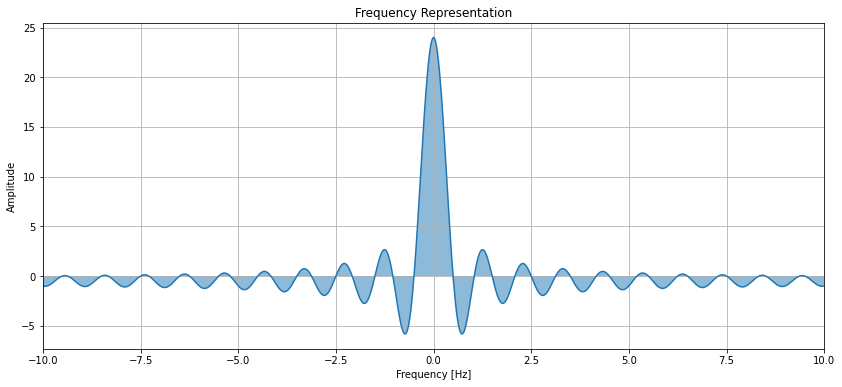

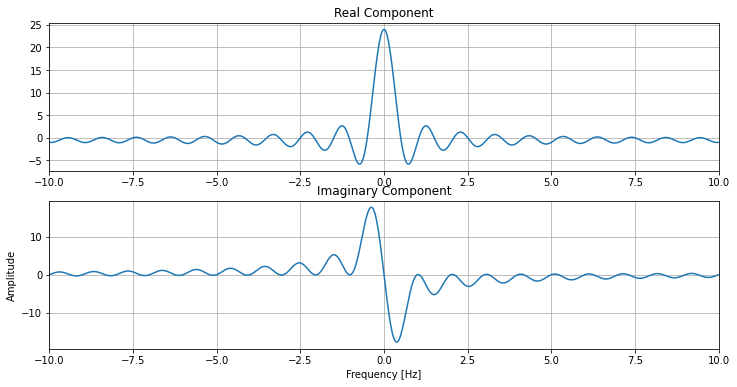

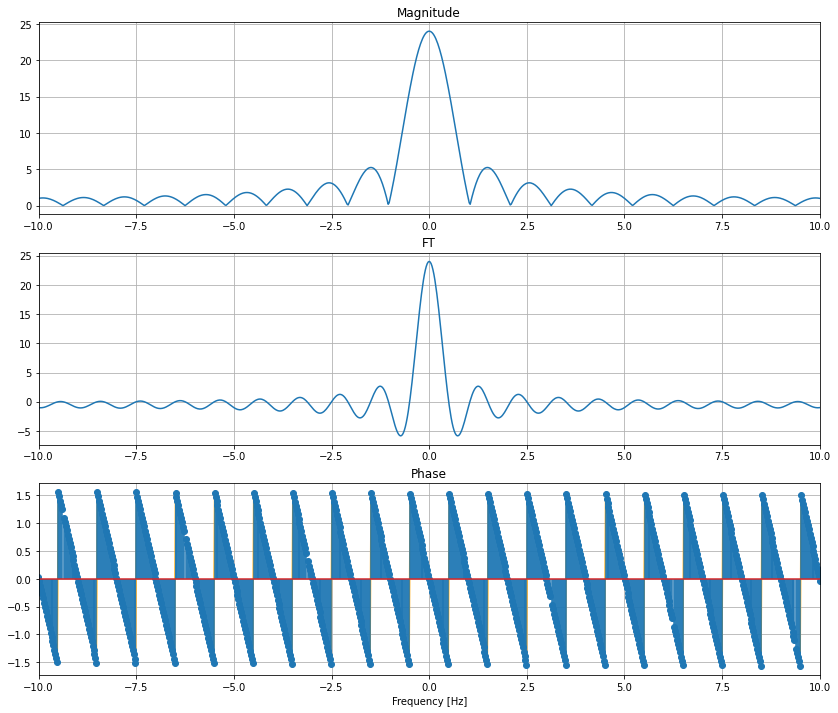

In [19]:
#Ejemplo:
if __name__=="__main__":
   Nsample = 1024
   dt = 1/25 # time step
   t = np.arange(Nsample)*dt
   t, pul = pulseR(t,2)
   Fourier_Transform(pul,t,Plot="simple")
   Fourier_Transform(pul,t,Plot="Imag_Real")
   Fourier_Transform(pul,t,Plot="Complete")
    
   